# Non-canonical negation in sign languages and spoken languages

My current project is focused on the transfer of negation patterns between sign languages and spoken languages.

I use the data from WALS database: namely, features 139A ('Irregular Negatives in Sign Languages') and 114A 
('Subtypes of Asymmetric Standard Negation'). The first map shows a number of irregular negative forms in each given
sign language. The second map explores subtypes of assymetrical negation in spoken languages. The project aims to compare the 
two distributions.

More specifically, I aim to explore two hypotheses:

<ol>
<li><b>Hyp1</b>: Areal distribution of complex negation patterns in sign languages corresponds to that of spoken languages,</li>
<li><b>Hyp2</b>: When there is a complex negation pattern in a given sign language, it can often be attributed to a corresponding
spoken language used in that area</li>
</ol>





In the next cells I import the CLDF datasets of WALS data from https://github.com/cldf-datasets/wals/tree/master/cldf
There are two datasets: languages (the genealogical and geographical data for each language) and values 
(all values for all WALS maps).

In [33]:
import sqlite3
import pandas as pd
values = pd.read_csv('values.csv')



In [30]:
languages = pd.read_csv('languages.csv')

Next, I select the parametres of maps 139A (<a href="https://wals.info/feature/139A#2/19.0/146.8"> 'Irregular Negatives in Sign Languages' </a>) and map 114A <a href="https://wals.info/feature/114A#2/18.0/149.2">
('Subtypes of Asymmetric Standard Negation') </a> from the 'values' dataset, which contains all the values for all maps.

In [31]:
values2 = values[values["Parameter_ID"].isin(['139A', '114A'])]


The two datasets are later merged into a single one
This new dataset contains information about sign + spoken languages, their parametres (whether there is assymetrical negation),
their location and genus.

In [98]:
languages = languages.rename(columns={'ID': 'Language_ID'})
dfmerge = pd.merge(languages, values2, how='inner', on = "Language_ID")
dfmerge.head()

,Language_ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,...,Samples_200,Country_ID,Source_x,ID,Parameter_ID,Value,Code_ID,Comment,Source_y,Example_ID
0,abi,Abipón,South America,-29.000000,-61.000000,abip1241,axb,Guaicuruan,NaN,Abipon,...,True,AR,Bybee-et-al-1994 Dobrizhoffer-1902 Najlis-1966,114A-abi,114A,3,114A-3,NaN,"Najlis-1966[70-71, passim]",NaN
1,abk,Abkhaz,Eurasia,43.083333,41.000000,abkh1244,abk,Northwest Caucasian,NaN,Northwest Caucasian,...,True,GE,Bybee-et-al-1994 Gecadze-1979 Hewitt-1979 Hewi...,114A-abk,114A,3,114A-3,NaN,Hewitt-1979[70-71],NaN
2,acm,Achumawi,North America,41.500000,-121.000000,achu1247,acv,Hokan,Palaihnihan,Achumawi,...,False,US,Olmsted-1964 Olmsted-1966 Olmsted-1977 de-Angu...,114A-acm,114A,1,114A-1,NaN,"de-Angulo-and-Freeland-1931[112, 115-116, passim]",NaN
3,aco,Acoma,North America,34.916667,-107.583333,west2632,kjq,Keresan,NaN,Keresan,...,True,US,Maring-1967 Miller-1965 Miller-1966 Nichols-19...,114A-aco,114A,3,114A-3,NaN,"Miller-1965[123, 182, passim]",NaN
4,ada,Adamorobe Sign Language,Africa,5.833333,-0.166667,adam1238,ads,other,NaN,Sign Languages,...,False,GH,Frishberg-1987,139A-ada,139A,3,139A-3,NaN,NaN,NaN


Then I need to bring the values of two maps to a common standard. The values of 114A have the following system: 1-3 mean
'one type of assymetry in negation', 4-6 mean 'there are more types of assymetry in negation marking',
7 means 'there is no assymetry'. The values of 139A follow a different system:
1 means 'no irregular negation markers', 2-3 means 'some irregular negation markers', 4 means 
'a lot of irregular negation markers'.

So, in order to compare the two maps, we need to make a common annotation system for these maps. Let it be thus:
<ul><li>1 means 'no assymetry in negation marking / no irregular negation markers',</li>
<li>2 means 'one type of assymetry in negation marking / some irregular negation markers',</li>
<li>3 means 'more than one type of assymetry in negation marking / many irregular negation markers'.</li></ul>

In [48]:

dfmerge.loc[(dfmerge["Value"] > 0) & (dfmerge["Value"] < 4) & (dfmerge["Parameter_ID"] == '114A'), "Value"] = 2
dfmerge.loc[(dfmerge["Value"] > 3) & (dfmerge["Value"] < 7) & (dfmerge["Parameter_ID"] == '114A'), "Value"] = 3
dfmerge.loc[(dfmerge["Value"] == 7) & (dfmerge["Parameter_ID"] == '114A'), "Value"] = 1
dfmerge.loc[(dfmerge["Value"] > 1) & (dfmerge["Value"] < 4) & (dfmerge["Parameter_ID"] == '139A'), "Value"] = 2
dfmerge.loc[(dfmerge["Value"] == 4) & (dfmerge["Parameter_ID"] == '139A'), "Value"] = 3

But after making a common annotation scheme for the two maps, it is evident that there is an uneven distribution of
irregular and regular negative markers across the two samples. In the 114A language sample (spoken languages), no
assymetry in negation was found in 114 languages, meanwhile in the 139A sample (sign languages), only one language 
does not have irregular negation markers. It can be shown in the graphs below.

The next important point is that the comparision that I am going to make is not at all straightforward. In the 114A language sample Miestamo surveyes an assymetry between affirmative sentences and corresponding negative sentences. In the 119A sample Zeshan explores patterns of negative suppletion and derivation. That is not a straight correspondence by any means

In [21]:
dfsign = dfmerge[dfmerge["Parameter_ID"] == "139A"]
dfsignlite = dfsign[['Value']]

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
dfsignlite1 = dfsignlite
dfsignlite1.loc[dfsignlite1['Value'] == 1, 'Value'] = 'no irregular negation markers'
dfsignlite1.loc[dfsignlite1['Value'] == 2, 'Value'] = 'some irregular negation markers'
dfsignlite1.loc[dfsignlite1['Value'] == 3, 'Value'] = 'many irregular negation markers'

C:\Users\Alexander\AppData\Local\Temp\ipykernel_14524\963202842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsignlite1.loc[dfsignlite1['Value'] == 2, 'Value'] = 'some irregular negation markers'
C:\Users\Alexander\AppData\Local\Temp\ipykernel_14524\963202842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsignlite1.loc[dfsignlite1['Value'] == 3, 'Value'] = 'many irregular negation markers'


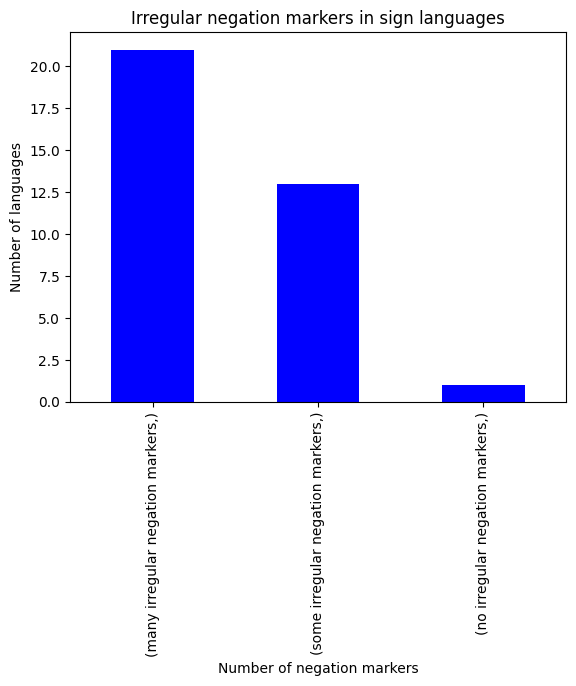

In [24]:
dfsignlite1.value_counts().plot.bar(color='blue')
plt.title('Irregular negation markers in sign languages')
plt.xlabel('Number of negation markers')
plt.ylabel('Number of languages');

It is visible from the graph that in the sign languages surveyed, there were almost no languages with no irregular negation markers. That stands in a sharp contrast to the patterns of the spoken languages sample.

In [25]:
dfspoken = dfmerge[dfmerge["Parameter_ID"] == "114A"]
dfspokenlite = dfspoken[['Value']]

In [26]:
dfspokenlite1 = dfspokenlite
dfspokenlite1.loc[dfspokenlite1['Value'] == 1, 'Value'] = 'no assymetry'
dfspokenlite1.loc[dfspokenlite1['Value'] == 2, 'Value'] = 'one type of assymetry'
dfspokenlite1.loc[dfspokenlite1['Value'] == 3, 'Value'] = 'more than one type of assymetry'

C:\Users\Alexander\AppData\Local\Temp\ipykernel_14524\4020635629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfspokenlite1.loc[dfspokenlite1['Value'] == 2, 'Value'] = 'one type of assymetry'
C:\Users\Alexander\AppData\Local\Temp\ipykernel_14524\4020635629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfspokenlite1.loc[dfspokenlite1['Value'] == 3, 'Value'] = 'more than one type of assymetry'


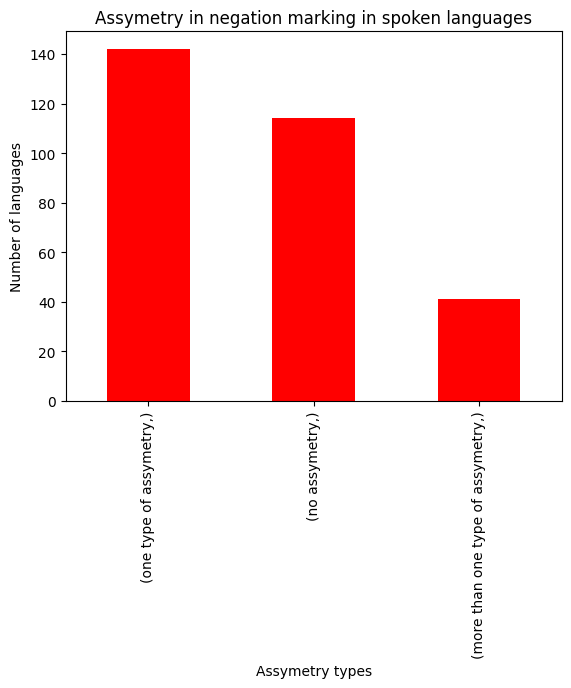

In [27]:
dfspokenlite1.value_counts().plot.bar(color='red')
plt.title('Assymetry in negation marking in spoken languages')
plt.xlabel('Assymetry types')
plt.ylabel('Number of languages');

The second graph shows a fundamentally different distribution. Almost a third of languages surveyed showed no assymetry in negation marking, which contrasts with the sign language data.

This contrast can be shown with a simple metric that I will call '<i>negation complexity index</i>'.

Negation complexity index is a mean value of 'negation value' of several languages. Let's recall the annotation scheme for negation marking.
<ul><li>1 means 'no assymetry in negation marking / no irregular negation markers',</li>
<li>2 means 'one type of assymetry in negation marking / some irregular negation markers',</li>
<li>3 means 'more than one type of assymetry in negation marking / many irregular negation markers'.</li></ul>

Then, linguistic areas where the negation complexity index is closer to 1 will have little to no assymetry in negation marking or little to no irregular negative markers. On the contrary, if the negation complexity index is closer to 3, a language from that area is expected to have complex assymetry in negation marking or many irregular negation markers.

First, let's compare the whole spoken language sample and the whole signed language sample by this metric.

In [28]:
print('The average negation complexity index of signed languages is', dfsign['Value'].mean())
print('The average negation complexity index of spoken languages is', dfspoken['Value'].mean())


The average negation complexity index of signed languages is 2.5714285714285716
The average negation complexity index of spoken languages is 1.754208754208754


It is clear that in signed languages sample there are significantly more complex negation patterns than in spoken one.

However, this difference can be viewed not only as an inherent difference of spoken and signed languages, but as a difference in the samples that were used in these maps. 
First, the sample size of spoken languages sample is almost 10 times larger than the sample size of signed languages.

In [32]:
print('The sample size of the signed language sample is',len(dfsign.index), 'languages')
print('The sample size of the spoken language sample is',len(dfspoken.index), 'languages')


The sample size of the signed language sample is 35 languages
The sample size of the spoken language sample is 297 languages


Next, it may be the case that the sign language sample is uneven. There are only 2 village sign languages in the sample (which are known to have little irregular negation markers). Moreover, the sample features one emerging sign language: Israeli sign language. 
<hr>
<br>


## Some areal patterns
In this section I am going to explore some areal patterns of irregular negatives in signed languages and look whether there is any correspondence between these patterns and patterns of assymetric negation in spoken languages.

### 1. Europe
The signed languages of Europe are reported to have many irregular negation markers. As the author puts it, 
>European sign languages as a whole predominantly have many irregular negatives with some negative derivation

However, if we look at the map of negation in spoken languages of Europe, the distribution will be different, with many
'white' dots indicating languages with no assymetrical negation.
<br> <br>
This can be illustrated by the negation complexity index introduced above. We can compare the negation complexity indexes of European signed languages with the worldwide average, as well as negation complexity indexes of European spoken languages with the worldwide average.

In [35]:
dfsigneurope = dfsign[(dfsign['Latitude']>36)&(dfsign['Latitude']<70)& (dfsign['Longitude'] > -15)&(dfsign['Longitude'] < 36)]
dfspokeneurope = dfspoken[(dfspoken['Latitude']>36)&(dfspoken['Latitude']<70)& (dfspoken['Longitude'] > -15)&(dfspoken['Longitude'] < 36)]

In [36]:
print('The average negation complexity index of European signed languages is', dfsigneurope['Value'].mean())
print('The average negation complexity index of European spoken languages is', dfspokeneurope['Value'].mean())

The average negation complexity index of European signed languages is 2.5833333333333335
The average negation complexity index of European spoken languages is 1.4285714285714286


The numbers presented above show that in signed languages the negation complexity index of European languages is similar to the worldwide average (2.58 vs. 2.57). In contrast, in spoken languages the complexity index of European languages is significantly lower than the worldwide average (1.42 vs. 1.75). Here is a graph that shows this difference:

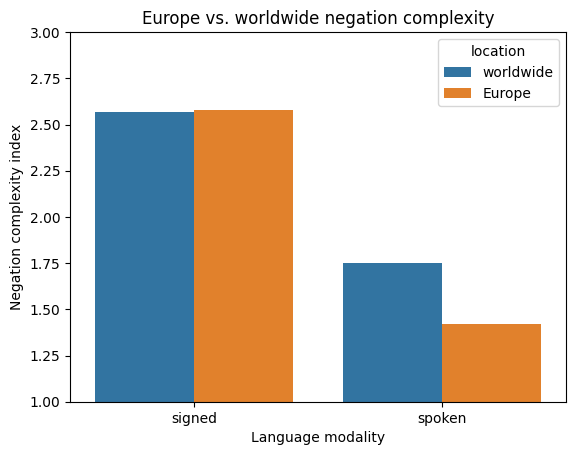

In [39]:
data1 = [
    {"modality": "signed", "location": 'worldwide', 'Value': 2.57}, 
    {"modality": "signed", "location": 'Europe', 'Value': 2.58}, 
    {"modality": "spoken", "location": 'worldwide', 'Value': 1.75}, 
    {"modality": "spoken", "location": 'Europe', 'Value': 1.42}
]
dfeuronumbers = pd.DataFrame(data1)
sns.barplot(x="modality", y="Value", hue='location', data=dfeuronumbers)
plt.ylim((1, 3))
plt.title('Europe vs. worldwide negation complexity')
plt.xlabel('Language modality')
plt.ylabel('Negation complexity index');

### 2. East Asia
This region is also identified as containing languages with many irregular negation markers. As the quote goes, 
>Sign languages in East Asia also have a large number of irregular negatives

In [44]:
dfsignasia = dfsign[(dfsign['Latitude']>22)&(dfsign['Latitude']<40)& (dfsign['Longitude'] > 110)&(dfsign['Longitude'] < 142)]
dfspokeneasia = dfspoken[(dfspoken['Latitude']>22)&(dfspoken['Latitude']<40)& (dfspoken['Longitude'] > 110)&(dfspoken['Longitude'] < 142)]

In [45]:
print('The average negation complexity index of East Asian signed languages is', dfsignasia['Value'].mean())
print('The average negation complexity index of East Asian spoken languages is', dfspokeneasia['Value'].mean())

The average negation complexity index of East Asian signed languages is 3.0
The average negation complexity index of East Asian spoken languages is 2.4


However, the number of East Asian languages surveyed is so small (5) that I cannot analyze these figures. Therefore, no conclusion is made on the topic.

## Mapping of signed languages with spoken languages
In this paragraph I will explore the hypothesis 2. 
>When there is a complex negation pattern in a given sign language, it can often be attributed to a corresponding spoken language used in that area

<br>
In order to achieve this, I will create a new dataframe with each signed language assigned a corresponding spoken language (if it exists in the sample). Unfortunately, it can only be done manually (I will use Google Spreadsheets for this purpose). 

In [133]:
dfmapping = pd.read_csv('mapping.csv')
dfmapping.head()

,Sign language,Spoken language,Sign value,Spoken value
0,American Sign Language,English,3,2
1,Auslan,English,3,2
2,British Sign Language,English,3,2
3,Chinese Sign Language,Mandarin,3,2
4,Deutsche Gebärdensprache,German,3,1


The resulting dataframe is quite small (24 rows), so no statistical testing can be applied to this type of data. However, visualizations will still be used.

The next chart shows average negation complexity values of spoken languages, which are grouped by a complexity value of a corresponding signed language.

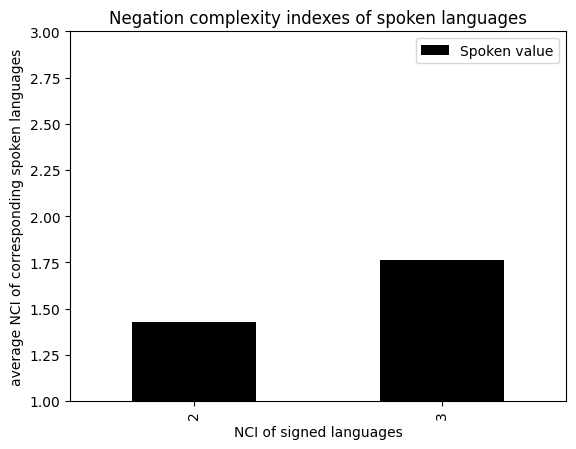

In [132]:
dfmapping.groupby(["Sign value"]).agg({"Spoken value": "mean"}).plot.bar(color='black')
plt.ylim((1, 3))
plt.title('Negation complexity indexes of spoken languages')
plt.xlabel('NCI of signed languages')
plt.ylabel('average NCI of corresponding spoken languages');


It is visible from the graph that the signed languages with a higher negation complexity index correspond to spoken languages with higher negation complexity indeces. However, this slight difference may not be statistically relevant, and there is no way to check it. The main problem with the statistical analysis is that the values of both columns are discrete (1, 2 or 3).  

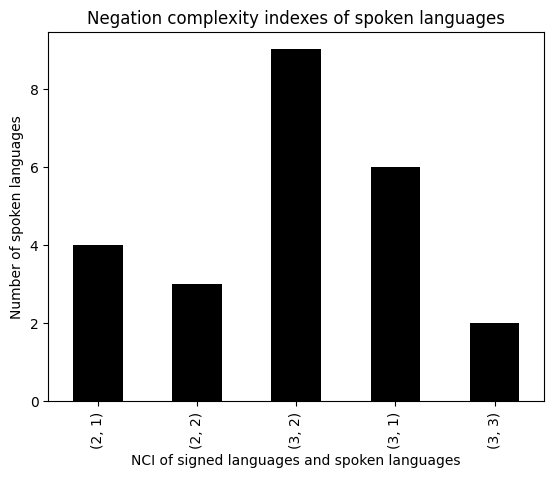

In [195]:
dfmapping.groupby(["Sign value"]).value_counts(['Spoken value']).plot.bar(color='black')
plt.title('Negation complexity indexes of spoken languages')
plt.xlabel('NCI of signed languages and spoken languages')
plt.ylabel('Number of spoken languages');


The next graph shows that there are no mappings in the sample where the negation complexity index of a spoken language is higher than the negation complexity index of a signed language.

In [193]:
dfmapping[dfmapping['Spoken language'] == 'French']

,Sign language,Spoken language,Sign value,Spoken value
12,Langue des Signes Française,French,3,1
13,Langue des Signes Québecoise,French,3,1


In [194]:
dfmapping[dfmapping['Spoken language'] == 'Spanish']

,Sign language,Spoken language,Sign value,Spoken value
14,Lengua de Señas Argentina,Spanish,3,1
15,Lengua de Señas Española,Spanish,2,1


The tables presented illustrate the differences between the negation complexity index of a spoken language and a corresponding signed language. 

## Indo-Pakistani Sign Language: individual focus
Lastly, I want to focus on the relationship between one specific sign language and one specific spoken language. <br>
Indo-Pakistani Sign Language (IPSL from now on) is an obvious outlier in the 139A language sample. A Pakistani variety of IPSL lacks irregular negative forms entirely, and an Indian variety has only one.
I am going to compare IPSL to Urdu then. The comparision will be twofold:
<ol>
    <li>Assymetric negation patterns in Urdu</li>
    <li>Irregular negation patterns in Urdu</li>
</ol>

### Assymetric negation patterns in Urdu
The whole language sample of Miestamo is dedicated to assymetries that may arise when negation is added.
The value for assymetric negation type for Urdu is *A/Cat*, which means 'marking of grammatical categories (such as tense, aspect, mood, person, number, etc.) under negation'. More specifically, when a negative particle *nahII* is added in the present tense, the person marking dissapears. Compare the following sentences:

>*…mAI hinsa tathaa logO kii hatya mE bharosaa nahII rakhtaa <br>
>I violence and people of murder in faith NEG keep* <br>
>“I do not believe in violence and the murder of people.” <br>


>*mAI Prataap hOO <br>
>I Pratap AUX.1SG <br>*
>'I am Pratap' <br>

This pair of examples shows that when there is *nahII* added, the auxiliary can be dropped. Therefore, the person agreement disappears. However, as described in (Snell, Weightman 2003:25), there is still an option to use both *nahII* and the auxiliary.

Actually, this pattern neatly corresponds to the patterns of IPSL, where it is either the negation or the auxiliary. Consider the following pair from (Zeshan 2000: 95)

>*MAIN' CA:E NAHIN'<br>
>I tea NEG*<br>
>'I haven't had tea yet'

>*BAP MA:N HAI<br>*
>*father mother IS<br>*
>My parents are alive<br>

However, this correspondence can be explained by universal preferences of signed languages and not by a spoken language influence. To be more precise, sign languages 'do not like agreement', as one may put it.

### Irregular negation patterns in Urdu
Although IPSL is reported not to have irregular negation markers, that is not the case for Urdu. Along with several negative particles (*na*, *nahII* and *mat*, see Lampp 2006), there are also nominal negative prefixes borrowed from Persian: *na* and *be*. Sometimes na can be attached to native Urdu stems as well, e.g. nasəmədʒh (‘credulous’). (Islam 2011: 64).

In her classification of irregular negation markers, U.Zeshan distinguishes between negative derivation and negative suppletion. Though cases of negative suppletion are harder to look for, I think I have an example. It is the echo-reduplication derivation, which seems to be an NPI in Urdu (Montaut 2010:40):

>*mere pâs koî pen-ven nahîN*<br>
>*of-me near INDEF pen-echo NEG*<br>
>‘I don’t have anything to write’<br>


## Conclusions
I had two hypotheses while doing this project. Unfortunately, the amount of data was scarce, and no firm conslusions have been made about either the areal correspondence of the two samples neither about the mapping. However, the project had a clear educational impact on me, as I dug into a new linguistic subdiscipline.